# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 2: задания 1 и 2 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

%pip install imageio

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\volce\appdata\local\programs\python\python311\lib\site-packages\dlib-19.24.99-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits = load_digits()

In [3]:
mnist_images = digits.images
mnist_data_flat = digits.data
mnist_target = digits.target

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



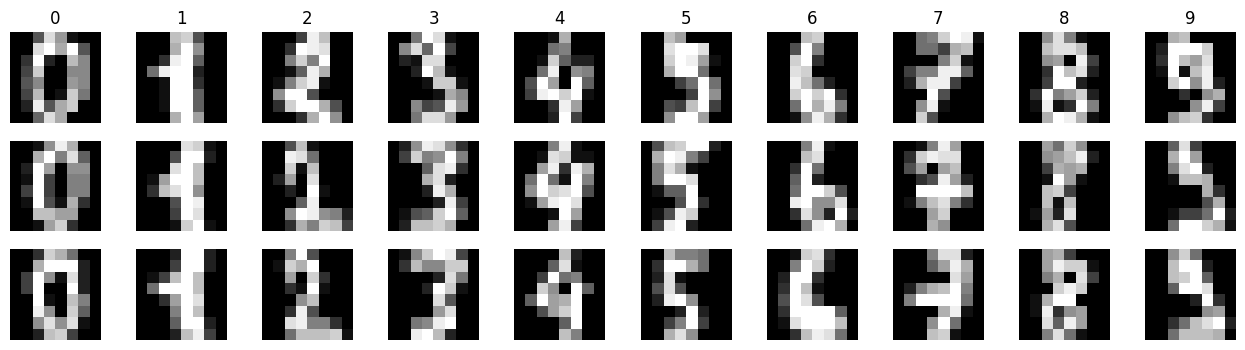

In [8]:
pic_box = plt.figure(figsize=(16, 4))

for i in range(30):
    sbplt = pic_box.add_subplot(3, 10, i + 1)
    if i < 10:
        sbplt.set_title(i)
    plt.imshow(mnist_images[i])
    plt.axis('off')
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [10]:
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, X_test, y_train, y_test = train_test_split(mnist_data_flat, mnist_target, test_size=0.2, random_state=0)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (1437, 64)
Training labels shape:  (1437,)
Test data shape:  (360, 64)
Test labels shape:  (360,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [11]:
%pip install future
from scripts.classifiers import KNearestNeighbor

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\volce\appdata\local\programs\python\python311\lib\site-packages\dlib-19.24.99-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [12]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [13]:
dists = classifier.compute_distances_two_loops(X_test)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


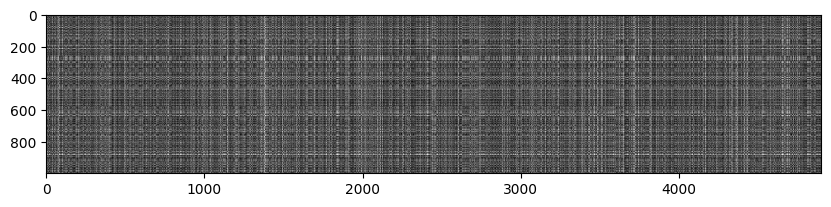

In [8]:
plt.imshow(dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [19]:
def accuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [20]:
print (f'Доля правильно классифицированных: {accuracy(classifier.predict_labels(dists, k = 3), y_test)}')

Доля правильно классифицированных: 0.9833333333333333


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [21]:
ks = list(range(2, 15))
accuracies = [accuracy(y_test, classifier.predict(X_test, k, 0)) for k in ks]

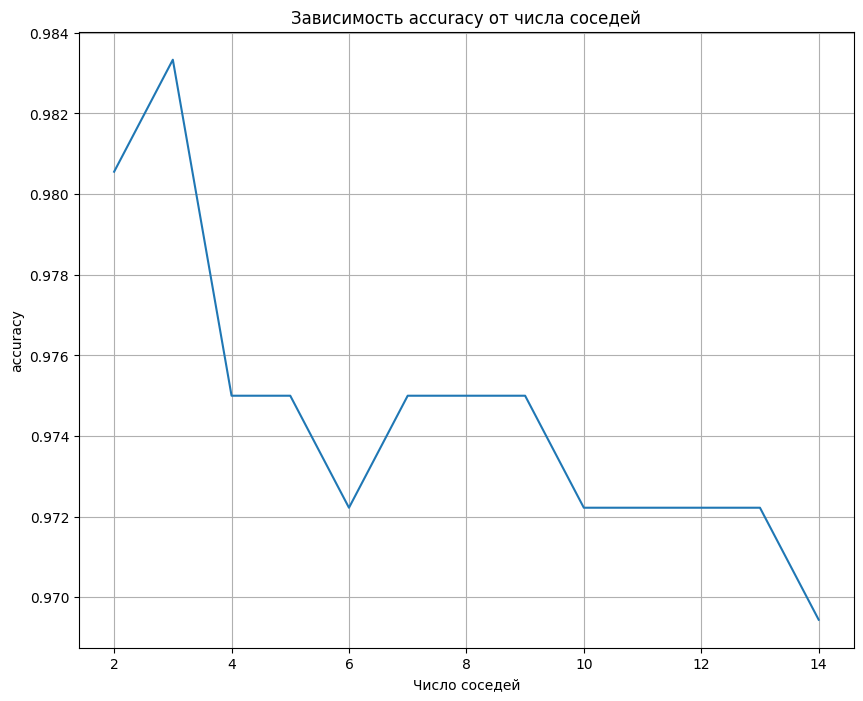

In [22]:
# Строим график зависиомсти
plt.title("Зависимость доли правильно классифицированных изображений от числа соседей")
plt.plot(ks, accuracies)
plt.xlabel("Число соседей")
plt.ylabel("accuracy")
plt.title("Зависимость accuracy от числа соседей")
plt.grid()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [25]:
# Реализуем метод k-fold
def cross_val(X, y, classifier, params = None, train_params = None, k = 5):
    # Делим выборки на фолды
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    results = []
    
    # Производим k итераций, во время каждой из которых один фолд выступает в роли тестового множества, а объединение 
    # остальных — в роли тренировочного.
    for ki in range(k):
        X_train_folds = np.vstack([fold for i, fold in enumerate(X_folds) if i != ki])
        X_test_folds = X_folds[ki]
        
        y_train_folds = np.hstack([fold for i, fold in enumerate(y_folds) if i != k])
        y_test_folds = y_folds[ki]
        
        classifier_folds = classifier()
        if params is not None:
            classifier_folds.train(X_train_folds, y_train_folds, **params)
        else:
            classifier_folds.train(X_train_folds, y_train_folds)
        
        if train_params is not None:
            svm_y_val_pred = classifier_folds.predict(X_test_folds, **train_params)
        else:
            svm_y_val_pred = classifier_folds.predict(X_test_folds)
        
        results.append(accuracy(svm_y_val_pred, y_test_folds))
        
    # Выбирается модель, показавшая наилучший результат
    return max(results)

In [27]:
neighbors_cross_val = {}

for k in range(2, 15):
    neighbors_cross_val[k] = cross_val(X_train,y_train, KNearestNeighbor, train_params=dict(k=k-1, num_loops=0), k=k)

# Выбираем то k, которое дало наибольший процент точности
best_k = list(neighbors_cross_val.keys())[list(neighbors_cross_val.values()).index(max(neighbors_cross_val.values()))]
print(f"Лучшее k на основе кросс-валидации = {best_k}")

Лучшее k на основе кросс-валидации = 10



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [28]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

y_pred = classifier.predict(X_test, k=best_k, num_loops=0)

accuracy(y_test, y_pred)

0.9722222222222222

1.11 Сделайте выводы по результатам 1 части задания.

1. На данном наборе данных модель практически идеально отрабатывает - accuracy почти 1.
2. При суммарном большом объеме обучающих и тестовых данных точность модели с двумя циклами считается очень долго. Быстрее всего в этом случае работает подсчет расстояния без использования циклов.
3. Лучший результат по графику - 3 соседа, по просс-валидации - 10 соседей.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [31]:
# Разделяем данные на выборки
num_train = 1300
num_val = 138
num_test = 300
num_dev = 59

svm_X_train = X_train[:num_train]
svm_y_train = y_train[:num_train]

svm_X_val = X_train[num_train: num_train + num_val]
svm_y_val = y_train[num_train: num_train + num_val]

svm_X_test = X_test[:num_test]
svm_y_test = y_test[:num_test]

svm_X_dev = X_test[num_test: num_test + num_dev]
svm_y_dev = y_test[num_test: num_test + num_dev]

In [32]:
# Переводим выборки в одномерный массив
svm_X_train = np.reshape(svm_X_train, (svm_X_train.shape[0], -1)).astype(np.float64)
svm_y_train = np.reshape(svm_y_train, (svm_y_train.shape[0],))

svm_X_test = np.reshape(svm_X_test, (svm_X_test.shape[0], -1)).astype(np.float64)
svm_y_test = np.reshape(svm_y_test, (svm_y_test.shape[0],))

svm_X_val = np.reshape(svm_X_val, (svm_X_val.shape[0], -1)).astype(np.float64)
svm_y_val = np.reshape(svm_y_val, (svm_y_val.shape[0],))

svm_X_dev = np.reshape(svm_X_dev, (svm_X_dev.shape[0], -1)).astype(np.float64)
svm_y_dev = np.reshape(svm_y_dev, (svm_y_dev.shape[0],))

In [33]:
# Выводим размеры
print('Training data shape: ', svm_X_train.shape)
print('Training labels shape: ', svm_y_train.shape)
print('Test data shape: ', svm_X_test.shape)
print('Test labels shape: ', svm_y_test.shape)
print('Validation data shape: ', svm_X_val.shape)
print('Validation labels shape: ', svm_y_val.shape)
print('Development data shape: ', svm_X_dev.shape)
print('Development labels shape: ', svm_y_dev.shape)

Training data shape:  (1300, 64)
Training labels shape:  (1300,)
Test data shape:  (300, 64)
Test labels shape:  (300,)
Validation data shape:  (137, 64)
Validation labels shape:  (137,)
Development data shape:  (59, 64)
Development labels shape:  (59,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[0.00000000e+00 3.20000000e-01 5.25538462e+00 1.17992308e+01
 1.18769231e+01 5.77230769e+00 1.33000000e+00 1.30769231e-01
 5.38461538e-03 2.02000000e+00]


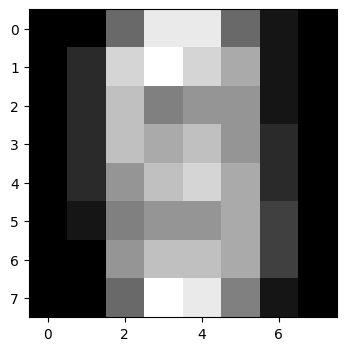

In [36]:
# Считаем среднее изображение по обучающей выборке svm_X_train
mean_image = np.mean(svm_X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((8, 8)).astype('uint8')) 
plt.show()

In [37]:
# Из какждой выборки вычитаем среднее изображение
svm_X_train -= mean_image
svm_X_test -= mean_image
svm_X_val -= mean_image
svm_X_dev -= mean_image

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее 1.

In [38]:
# Используя np.hstack добавляем справа столбец из единиц к каждой выборке
svm_X_train = np.hstack([svm_X_train, np.ones((svm_X_train.shape[0], 1))])
svm_X_test = np.hstack([svm_X_test, np.ones((svm_X_test.shape[0], 1))])
svm_X_val = np.hstack([svm_X_val, np.ones((svm_X_val.shape[0], 1))])
svm_X_dev = np.hstack([svm_X_dev, np.ones((svm_X_dev.shape[0], 1))])

print(svm_X_train.shape, svm_X_test.shape, svm_X_val.shape, svm_X_dev.shape)

(1300, 65) (300, 65) (137, 65) (59, 65)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [40]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(65, 10) * 0.0001

loss, grad = svm_loss_naive(W, svm_X_dev, svm_y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.003154



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [41]:
print("Without reg")
from scripts.gradient_check import grad_check_sparse
loss, grad = svm_loss_naive(W, svm_X_dev, svm_y_dev, 0.0)
f = lambda w: svm_loss_naive(w, svm_X_dev, svm_y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

print("\nWith reg")
loss, grad = svm_loss_naive(W, svm_X_dev, svm_y_dev, 5e1)
f = lambda w: svm_loss_naive(w, svm_X_dev, svm_y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

Without reg
numerical: -5.492047 analytic: -5.492047, relative error: 1.238005e-11
numerical: 6.173585 analytic: 6.173585, relative error: 1.458256e-11
numerical: -3.061890 analytic: -3.061890, relative error: 1.518515e-11
numerical: -11.096245 analytic: -11.096245, relative error: 8.936257e-12
numerical: 0.056271 analytic: 0.056271, relative error: 2.592637e-09
numerical: 2.006597 analytic: 2.006597, relative error: 5.946679e-11
numerical: 3.109987 analytic: 3.109987, relative error: 2.686066e-11
numerical: -0.138344 analytic: -0.138344, relative error: 2.018477e-10
numerical: 0.460678 analytic: 0.460678, relative error: 1.751109e-10
numerical: 4.664276 analytic: 4.664276, relative error: 1.997150e-11

With reg
numerical: -0.671798 analytic: -0.675645, relative error: 2.854730e-03
numerical: 1.876368 analytic: 1.886535, relative error: 2.701854e-03
numerical: -1.997883 analytic: -1.998687, relative error: 2.012662e-04
numerical: 1.166568 analytic: 1.164568, relative error: 8.579171e-0

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [42]:
from scripts.classifiers.linear_svm import svm_loss_vectorized

tic = time.time()
_, grad_naive = svm_loss_naive(W, svm_X_dev, svm_y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, svm_X_dev, svm_y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.003993s
Vectorized loss and gradient: computed in 0.001004s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [43]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(svm_X_train, svm_y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 16.862482
iteration 100 / 1500: loss 13.711714
iteration 200 / 1500: loss 11.824966
iteration 300 / 1500: loss 10.681735
iteration 400 / 1500: loss 9.982655
iteration 500 / 1500: loss 9.547135
iteration 600 / 1500: loss 9.288363
iteration 700 / 1500: loss 9.136422
iteration 800 / 1500: loss 9.040036
iteration 900 / 1500: loss 8.987409
iteration 1000 / 1500: loss 8.950926
iteration 1100 / 1500: loss 8.925930
iteration 1200 / 1500: loss 8.912412
iteration 1300 / 1500: loss 8.904348
iteration 1400 / 1500: loss 8.901202
That took 0.509865s


In [45]:
svm_y_train_pred = svm.predict(svm_X_train)
print('training accuracy: %f' % (accuracy(svm_y_train_pred, svm_y_train)))
svm_y_val_pred = svm.predict(svm_X_val)
print('validation accuracy: %f' % (accuracy(svm_y_val_pred, svm_y_val)))

training accuracy: 0.862308
validation accuracy: 0.905109


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [46]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

result = []
for rate in learning_rates:
    for reg in regularization_strengths:
        result.append({"rate": rate, "reg": reg, "accur": cross_val(svm_X_train, svm_y_train, LinearSVM, dict(learning_rate=rate, reg=reg))})
        
maxAccuracy = max(result, key=lambda x:x['accur'])
print(f"\nМаксимальная точность {maxAccuracy['accur']} была достигнута при rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}")        


Максимальная точность 0.8461538461538461 была достигнута при rate = 5e-05, reg = 25000.0


In [47]:
svm_classifier = LinearSVM()
svm_classifier.train(svm_X_train, svm_y_train, learning_rate=maxAccuracy['rate'], reg=maxAccuracy['reg'])

print(f"Оценка точности на тестовой выборке с rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}. " +  
      f'Полученная точность = {calculate_accuracy(svm_classifier.predict(svm_X_test), svm_y_test)}')

Оценка точности на тестовой выборке с rate = 5e-05, reg = 25000.0. Полученная точность = 0.7733333333333333


2.9 Сделайте выводы по второй части задания

Согласно кросс-валидации, лучшая точность составила 0.773 и была достигнута при rate = 5e-05 и reg = 25000.0

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [48]:
# Разделяем данные на выборки
num_train = 1300
num_val = 138
num_test = 300
num_dev = 59

softmax_X_train = X_train[:num_train]
softmax_y_train = y_train[:num_train]

softmax_X_val = X_train[num_train: num_train + num_val]
softmax_y_val = y_train[num_train: num_train + num_val]

softmax_X_test = X_test[:num_test]
softmax_y_test = y_test[:num_test]

softmax_X_dev = X_test[num_test: num_test + num_dev]
softmax_y_dev = y_test[num_test: num_test + num_dev]

In [49]:
# Переводим выборки в одномерный массив
softmax_X_train = np.reshape(softmax_X_train, (softmax_X_train.shape[0], -1)).astype(np.float64)
softmax_y_train = np.reshape(softmax_y_train, (softmax_y_train.shape[0],))

softmax_X_test = np.reshape(softmax_X_test, (softmax_X_test.shape[0], -1)).astype(np.float64)
softmax_y_test = np.reshape(softmax_y_test, (softmax_y_test.shape[0],))

softmax_X_val = np.reshape(softmax_X_val, (softmax_X_val.shape[0], -1)).astype(np.float64)
softmax_y_val = np.reshape(softmax_y_val, (softmax_y_val.shape[0],))

softmax_X_dev = np.reshape(softmax_X_dev, (softmax_X_dev.shape[0], -1)).astype(np.float64)
softmax_y_dev = np.reshape(softmax_y_dev, (softmax_y_dev.shape[0],))

In [50]:
# Выводим размеры
print('Training data shape: ', softmax_X_train.shape)
print('Training labels shape: ', softmax_y_train.shape)
print('Test data shape: ', softmax_X_test.shape)
print('Test labels shape: ', softmax_y_test.shape)
print('Validation data shape: ', softmax_X_val.shape)
print('Validation labels shape: ', softmax_y_val.shape)
print('Development data shape: ', softmax_X_dev.shape)
print('Development labels shape: ', softmax_y_dev.shape)

Training data shape:  (1300, 64)
Training labels shape:  (1300,)
Test data shape:  (300, 64)
Test labels shape:  (300,)
Validation data shape:  (137, 64)
Validation labels shape:  (137,)
Development data shape:  (59, 64)
Development labels shape:  (59,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[0.00000000e+00 3.20000000e-01 5.25538462e+00 1.17992308e+01
 1.18769231e+01 5.77230769e+00 1.33000000e+00 1.30769231e-01
 5.38461538e-03 2.02000000e+00]


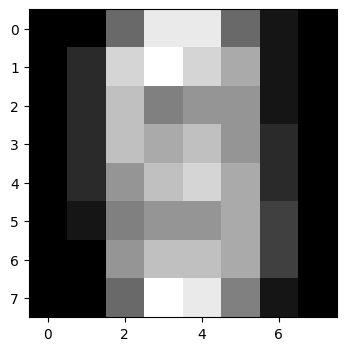

In [52]:
# Считаем среднее изображение по обучающей выборке svm_X_train
mean_image = np.mean(softmax_X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((8, 8)).astype('uint8')) 
plt.show()

In [53]:
# Из какждой выборки вычитаем среднее изображение
softmax_X_train -= mean_image
softmax_X_test -= mean_image
softmax_X_val -= mean_image
softmax_X_dev -= mean_image

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [54]:
# Используя np.hstack добавляем справа столбец из единиц к каждой выборке
softmax_X_train = np.hstack([softmax_X_train, np.ones((softmax_X_train.shape[0], 1))])
softmax_X_test = np.hstack([softmax_X_test, np.ones((softmax_X_test.shape[0], 1))])
softmax_X_val = np.hstack([softmax_X_val, np.ones((softmax_X_val.shape[0], 1))])
softmax_X_dev = np.hstack([softmax_X_dev, np.ones((softmax_X_dev.shape[0], 1))])

print(softmax_X_train.shape, softmax_X_test.shape, softmax_X_val.shape, softmax_X_dev.shape)

(1300, 65) (300, 65) (137, 65) (59, 65)


3.4 Реализуйте функции в classifiers/softmax.py




In [55]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(65, 10) * 0.0001
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 9.001874
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [56]:
print("Without reg")
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)
from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


print("\nWith reg")
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

Without reg
numerical: -0.748644 analytic: -0.748644, relative error: 6.496350e-11
numerical: 0.930326 analytic: 0.930326, relative error: 8.608661e-11
numerical: -2.016180 analytic: -2.016180, relative error: 4.457004e-11
numerical: -0.953325 analytic: -0.953325, relative error: 5.164081e-11
numerical: -2.392399 analytic: -2.392399, relative error: 3.920401e-11
numerical: -2.359022 analytic: -2.359022, relative error: 3.793482e-11
numerical: -3.539544 analytic: -3.539544, relative error: 2.447009e-12
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000143 analytic: 0.000143, relative error: 7.906921e-07
numerical: 0.000000 analytic: 0.000000, relative error: nan

With reg
numerical: -1.142785 analytic: -1.143935, relative error: 5.028776e-04
numerical: 0.647046 analytic: 0.648790, relative error: 1.346012e-03
numerical: 0.005173 analytic: 0.011061, relative error: 3.626852e-01
numerical: 1.743013 analytic: 1.739473, relative error: 1.016673e-03
numerical: -0.99

C:\Users\volce\DLCourse\lab1-2\scripts\gradient_check.py:126: RuntimeWarning: invalid value encountered in double_scalars
  rel_error = (abs(grad_numerical - grad_analytic) /


3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [57]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 9.001874e+00 computed in 0.004002s
vectorized loss: 9.001874e+00 computed in 0.001002s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [58]:
from scripts.classifiers import Softmax
softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(softmax_X_train, softmax_y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 17.708282
iteration 100 / 1500: loss 14.220175
iteration 200 / 1500: loss 12.153289
iteration 300 / 1500: loss 10.871309
iteration 400 / 1500: loss 10.102424
iteration 500 / 1500: loss 9.618489
iteration 600 / 1500: loss 9.344188
iteration 700 / 1500: loss 9.156855
iteration 800 / 1500: loss 9.059584
iteration 900 / 1500: loss 8.997225
iteration 1000 / 1500: loss 8.948971
iteration 1100 / 1500: loss 8.933441
iteration 1200 / 1500: loss 8.929130
iteration 1300 / 1500: loss 8.908318
iteration 1400 / 1500: loss 8.903648
That took 0.534782s


3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [59]:
softmax_y_train_pred = softmax.predict(softmax_X_train)
print(f'training accuracy: {accuracy(softmax_y_train_pred, softmax_y_train)}')
softmax_y_val_pred = softmax.predict(softmax_X_val)
print(f'validation accuracy: {accuracy(softmax_y_val_pred, softmax_y_val)}')

training accuracy: 0.8623076923076923
validation accuracy: 0.9051094890510949


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [60]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

result = []
for rate in learning_rates:
    for reg in regularization_strengths:
        result.append({"rate": rate, "reg": reg, "accur": cross_val(softmax_X_train, softmax_y_train, Softmax, dict(learning_rate=rate, reg=reg))})
        
maxAccuracy = max(result, key=lambda x:x['accur'])
print(f"\nМаксимальная точность {maxAccuracy['accur']} была достигнута при rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}") 


Максимальная точность 0.8346153846153846 была достигнута при rate = 5e-05, reg = 25000.0


In [61]:
softmax_classifier = Softmax()
softmax_classifier.train(softmax_X_train, softmax_y_train, learning_rate=maxAccuracy['rate'], reg=maxAccuracy['reg'])

print(f"Оценка точности на тестовой выборке с rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}. " +  
      f'Полученная точность = {calculate_accuracy(softmax_classifier.predict(softmax_X_test), softmax_y_test)}')

Оценка точности на тестовой выборке с rate = 5e-05, reg = 25000.0. Полученная точность = 0.82


3.10 Сделайте выводы по третьей части задания

Наилучшая точность модели была достигнута при rate = 5e-05 и reg = 25000.0. Она составила 0.8346